##  Section 3. Gradient Descent 방법

## 문제 1 Gradient Descent을 활용한 Linear Regression

* **Gradient Descent**을 이용해 아래 데이터를 linear regression 해주세요. <br>

###  Gradient Descent

1. 우선 가중치(w)을 초기화 합니다.  (w1,  w0) <br>
정규 분포(mean = 0.0, stddev=0.1) 을 이용합니다  

2. $ \frac{\partial  loss }{ \partial w0} $, $ \frac{\partial  loss }{ \partial w1} $ 을 구합니다. 

3. Loss 을 구합니다. <br>
$Loss = \frac{1}{2N}* {\sum^N_{i=1} (y_{pred} - y_{true})^2}$ <br>

4. gradient Descent 을 구현합니다. 

 $ \hat{w} = w - \alpha * \frac{\partial  loss }{ \partial w}$<br>  수식을 이용해 $w$ 을 수정합니다. 적절한  learning rate($\alpha$)을 설정해주세요! 
 
5. 5번 과정을 Loss 가 더 줄어들지 않을 때까지 실행합니다. 

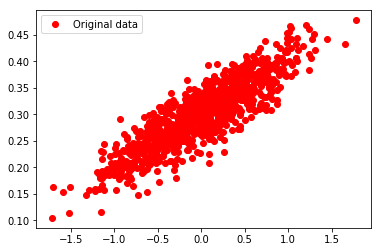

In [0]:
# 아래 코드를 실행해 주세요 
from sklearn.datasets import load_iris
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

num_points = 1000
vectors_set = []
for i in range(num_points):
    x1= np.random.normal(0.0, 0.55)
    y1= x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

xs = np.asarray([v[0] for v in vectors_set])
ys = np.asarray([v[1] for v in vectors_set])

plt.plot(xs, ys, 'ro', label='Original data')
plt.legend()
plt.show()

#### 답안지 입력란
* 아래에 답을 서술하여 주세요


-0.05276448027066996 -0.13532055637082643
0.170043907663079 -0.07606056623148583
0.2518801795437219 -0.031148987371891982
0.28204644226024383 0.002481273794938526
0.2932461122974634 0.027518439239676562
0.297462861485552 0.04610552946568838
0.29909334103411717 0.05988504714312939
0.299754629254719 0.07009348117485015
0.3000444416850326 0.07765375263636207
0.3001858890821246 0.08325188435190296


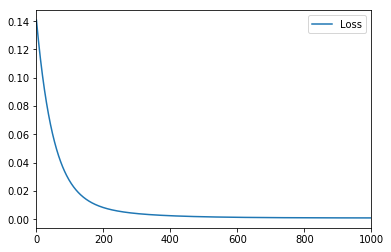

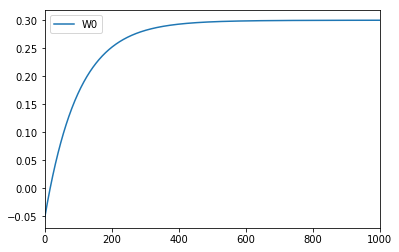

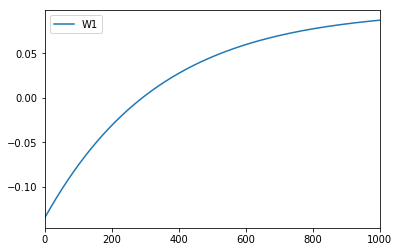

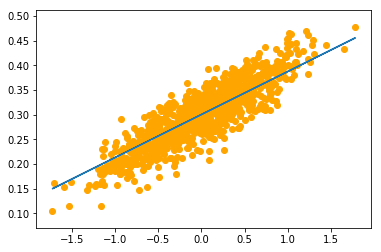

In [0]:
w1 = np.random.normal(0,0.1)
w0 = np.random.normal(0,0.1)

def cal_w0_deriv(w0,w1):           #w0 미분
  return(w1*xs + w0 - ys).mean()

def cal_w1_deriv(w0,w1):           #w1 미분
  return((w1*xs + w0 - ys)*xs).mean()

def cal_MSE(w0,w1):
  pred = w1*xs + w0
  return((pred - ys)**2).mean()

learning_rate = 0.01
epoch = 1000

MSE = cal_MSE(w0,w1) #loss 계산

w0_history = [w0]    #w0 변화값 리스트
w1_history = [w1]    #w1 변화값 리스트
MSE_history = [MSE]  #loss 리스트

for i in range(epoch):
  old_w0 = w0_history[-1] #가장 최신꺼 뽑아옴
  old_w1 = w1_history[-1]
  
  if i % 100 == 0 :
    print(old_w0,old_w1)
  
  dw0 = cal_w0_deriv(old_w0, old_w1) #미분값 계산
  dw1 = cal_w1_deriv(old_w0, old_w1)
  
  new_w0 = old_w0 - learning_rate * dw0 #새로운 w0 계산
  new_w1 = old_w1 - learning_rate * dw1 #새로운 w1 계산
  new_mse = cal_MSE(new_w0, new_w1)     #새로운 loss값 계산
  
  w0_history.append(new_w0)#리스트에 추가
  w1_history.append(new_w1)
  MSE_history.append(new_mse)

  
  hist_df = pd.DataFrame({
    "W0":w0_history,
    "W1":w1_history,
    "Loss":MSE_history
})
  
hist_df.plot(y = 'Loss') #loss 차트
hist_df.plot(y = 'W0')   #
hist_df.plot(y = 'W1')
plt.show()

plt.scatter(xs, ys, color = 'orange', marker = "o")
plt.plot(xs,w0_history[-1] + xs * w1_history[-1])

plt.show()

#### 정답 확인
* 아래와 같이 출력이 나오도록 해주세요

![Imgur](https://i.imgur.com/zEiW7zM.png)